## Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In diesem Notebook lernen Sie die zuvor erlernten Grundlagen des Supervised Learnings anhand des mpg Datasets anzuwenden. Hierfür wird sowohl eine Regression, als auch eine Klassifikation mithilfe von neuronalen Netzen durchgeführt. Da die Business & Data Understanding Schritte eigentlich vorgelagert wären wird hier noch einmal auf ein paar Tools/Packages und hilfreiche Methoden für die Herangehensweise an solche ML-Probleme gegeben.

In [2]:
%matplotlib inline
plt.rc('font', size=16)
mpl.rcParams['figure.facecolor'] = 'white'

## Daten laden

In [3]:
mpg = sns.load_dataset("mpg")

Daten werden als pandas-Dataframe ausgegeben

In [4]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Pandas Dataframes kombinieren unterschiedliche Datentypen in einer Tabellenstruktur

In [5]:
mpg.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### loc und iloc zum indexieren und filtern

**loc:** immer bei nicht-numerischen Spaltenbezeichnungen oder boolschen Ausdrücken

In [6]:
mpg.loc[mpg.horsepower > 200, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw)
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
27,11.0,8,318.0,210.0,4382,13.5,70,usa,dodge d200
67,11.0,8,429.0,208.0,4633,11.0,72,usa,mercury marquis
94,13.0,8,440.0,215.0,4735,11.0,73,usa,chrysler new yorker brougham
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom
116,16.0,8,400.0,230.0,4278,9.5,73,usa,pontiac grand prix


In [7]:
mpg.loc[mpg.horsepower > 200, ['origin','mpg']]

,origin,mpg
6,usa,14.0
7,usa,14.0
8,usa,14.0
13,usa,14.0
25,usa,10.0
27,usa,11.0
67,usa,11.0
94,usa,13.0
95,usa,12.0
116,usa,16.0


**iloc:** immer wenn nach numerischen Spalten gefiltert/indexiert werden soll

In [8]:
mpg.iloc[:5, :] #Ersten 5 Zeilen, Achtung:Letzter Index ist exklusiv!

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
mpg.iloc[:5,:-1] #Ersten 5 Zeilen und alle Spalten außer die letzte

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


### Visuelle Übersicht durch Pairplot

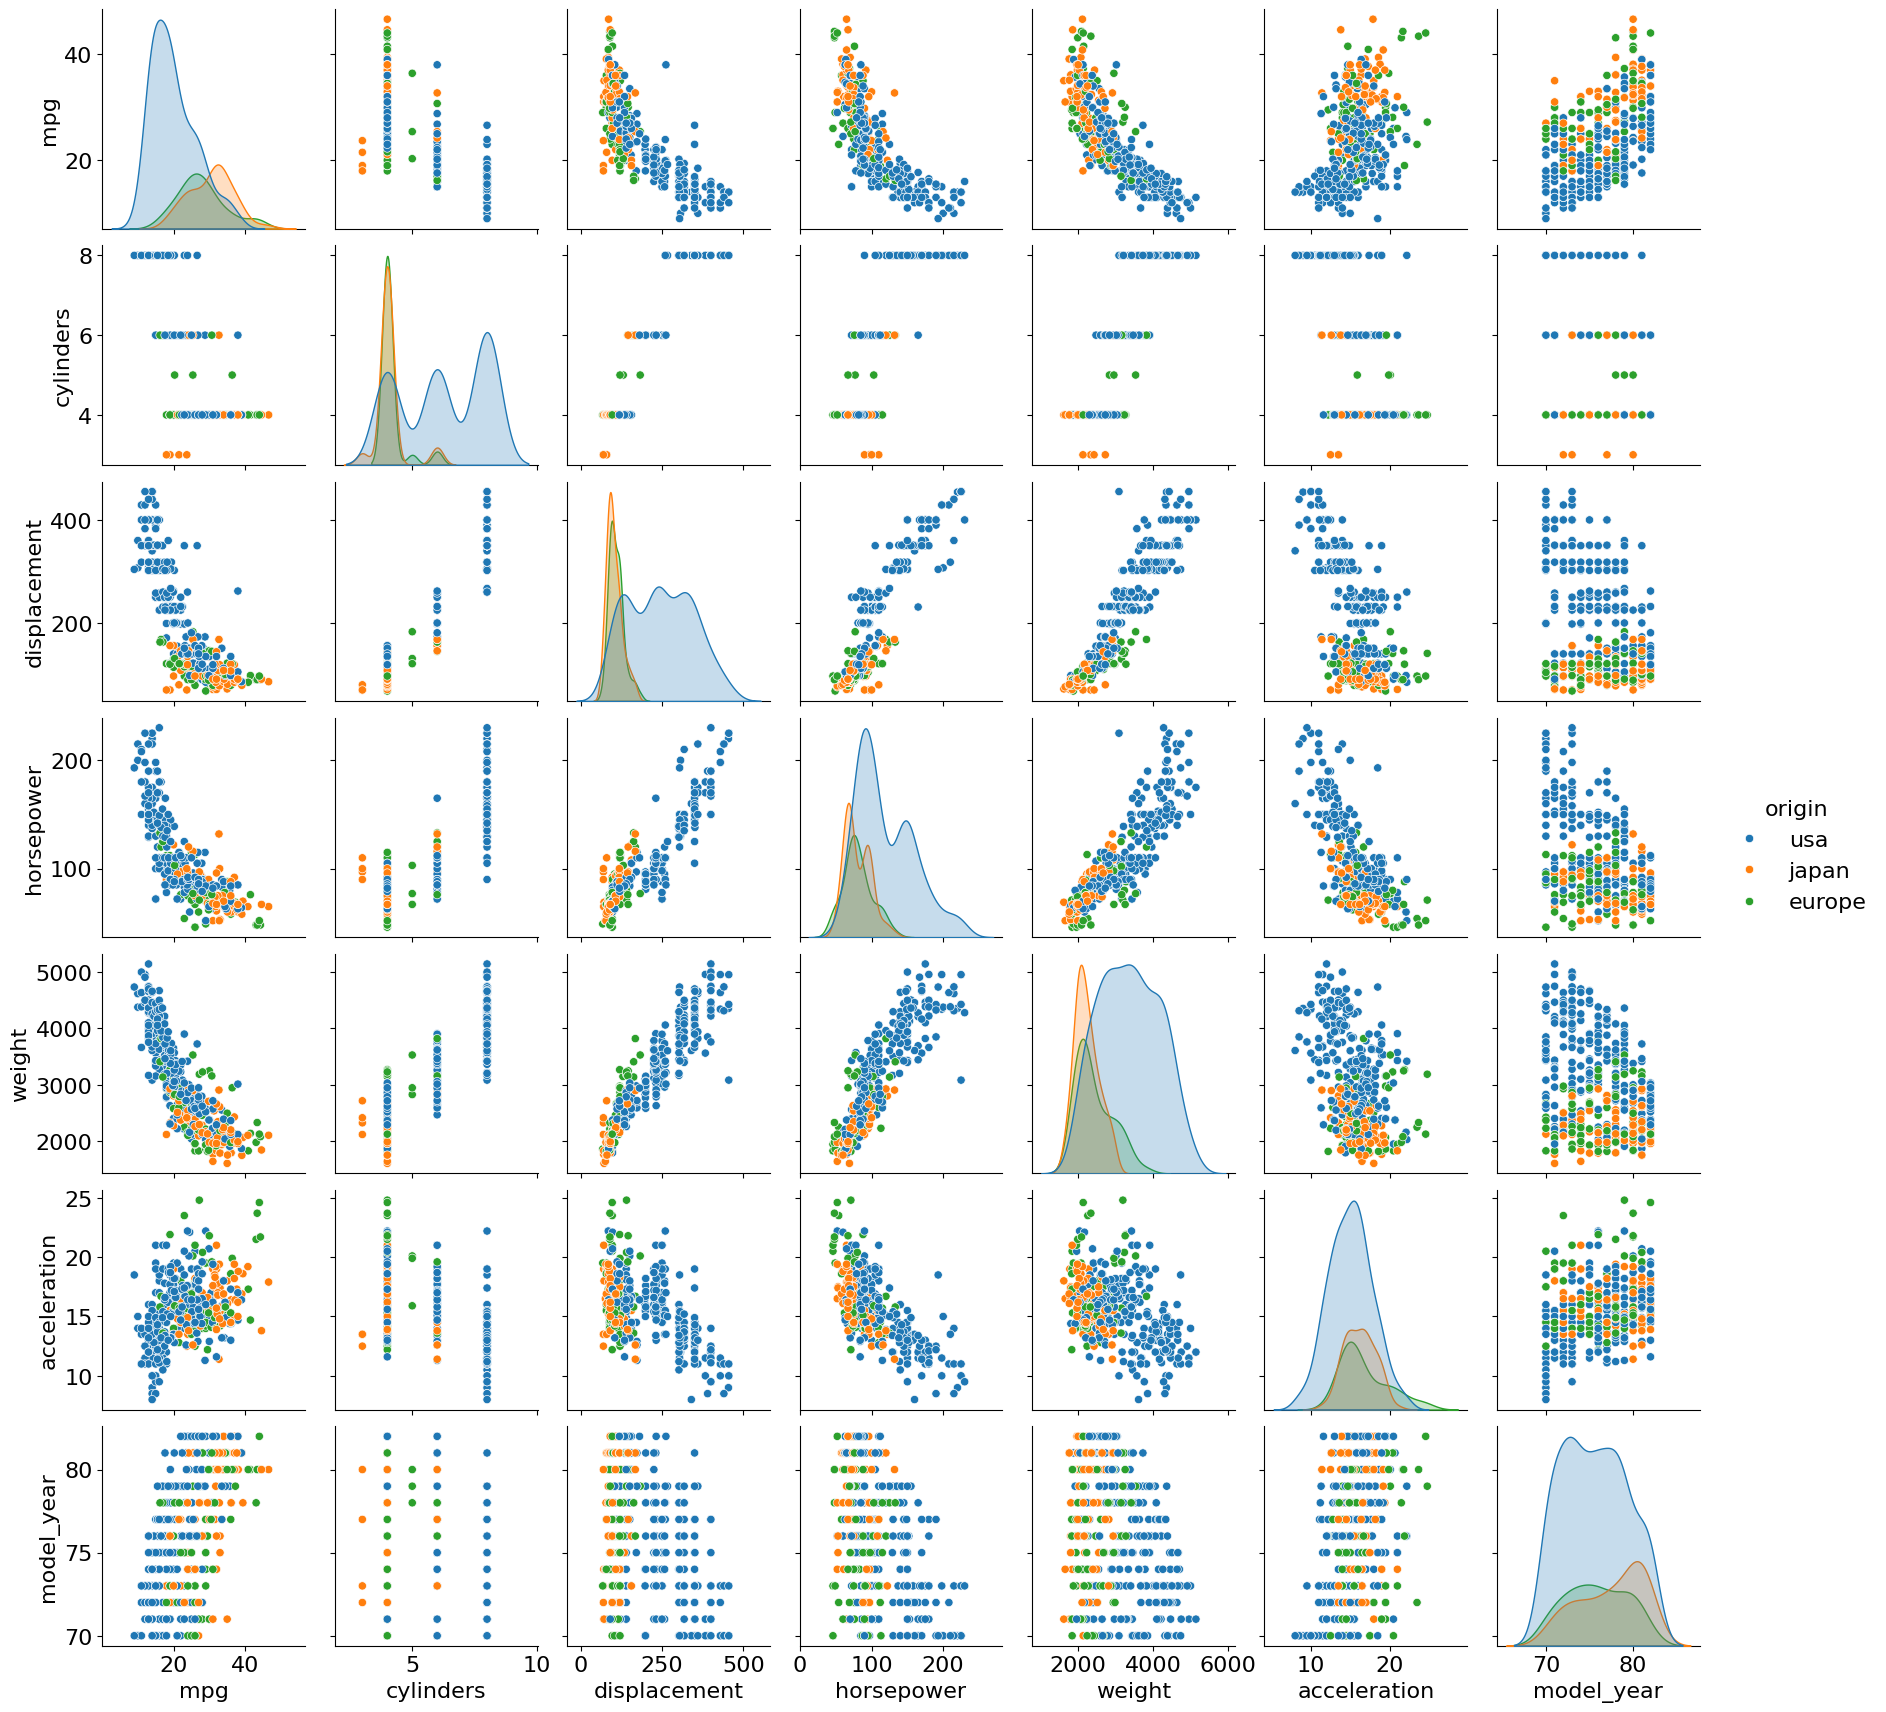

In [10]:
sns.pairplot(mpg.iloc[:,:-1], hue="origin")
plt.show()

### Fehlwertanalyse

In [11]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [12]:
mpg.loc[mpg.horsepower.isna()] # Alle Fehlwerte ausgeben

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


### Fehlwerte imputieren

Methode A Deletion -> nicht empfohlen

Methode B Imputation

Methode C ML-Modell anhand vorhandener Features

Die Verteilung der horsepower für Japan und Europa sind sehr ähnlich. Die der USA unterscheidet sich jedoch deutlich. Ein einheitlicher MIttelwert ist deshalb keine gute Idee.

<Axes: xlabel='horsepower', ylabel='origin'>

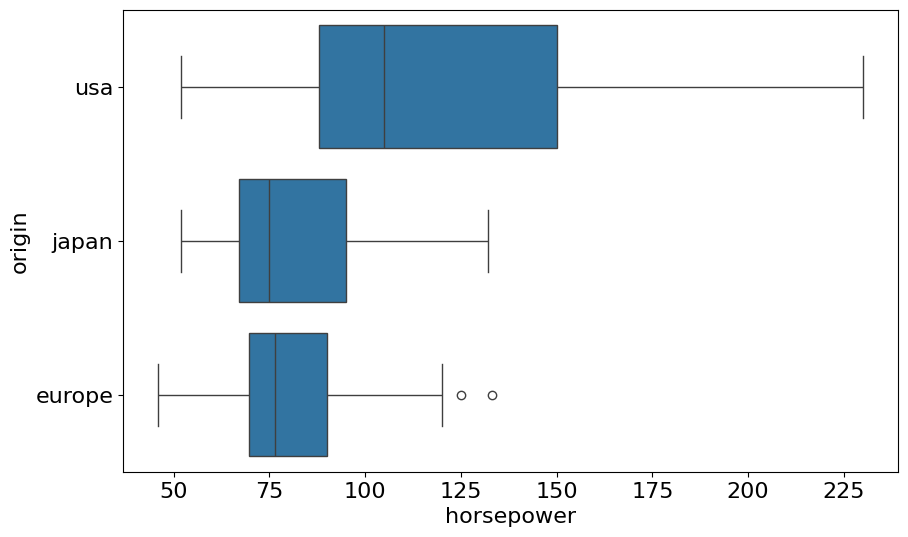

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=mpg, x='horsepower', y='origin') 

Imputation mit dem Mittelwert ohne fillna-Methode

In [14]:
mpg.loc[mpg.horsepower.isna(),'horsepower'] = mpg.horsepower.mean()

Imputation mit dem Mittelwert, gruppiert nach der Klasse -> bessere Methode, da Autos je nach Origin unterschiedliche horsepower haben


In [15]:
fill_values = mpg.groupby('origin')['horsepower'].transform('mean')
mpg.horsepower = mpg.horsepower.fillna(fill_values)

In [16]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

# Regression

Für dieses Regressionsmodell wollen wir die mpg(Miles per gallon) vorhersagen, welches ein Fahrzeug fahren kann.

## Pre-Processing

In [17]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

In [18]:
mpg.origin

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 398, dtype: object

In [19]:
mpg.origin = label_encoder.fit_transform(mpg.origin) ## Frage: Label Encoding vs. One-Hot Encoding

In [20]:
mpg.origin

0      2
1      2
2      2
3      2
4      2
      ..
393    2
394    0
395    2
396    2
397    2
Name: origin, Length: 398, dtype: int64

### Z-Transformation / StandardSkalierung

In [21]:
mpg.loc[:,'cylinders':'acceleration'] = scaler.fit_transform(mpg.loc[:,'cylinders':'acceleration']) ## Mittelwert 0, Standardabweichung 1 (nicht immer genau möglich)

/var/folders/gd/2lmpnq392gd70tbtk1y3fs9nxm_fkt/T/ipykernel_95336/1985532564.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.49819126  1.49819126  1.49819126  1.49819126  1.49819126  1.49819126
  1.49819126  1.49819126  1.49819126  1.49819126  1.49819126  1.49819126
  1.49819126  1.49819126 -0.85632057  0.32093534  0.32093534  0.32093534
 -0.85632057 -0.85632057 -0.85632057 -0.85632057 -0.85632057 -0.85632057
  0.32093534  1.49819126  1.49819126  1.49819126  1.49819126 -0.85632057
 -0.85632057 -0.85632057 -0.85632057  0.32093534  0.32093534  0.32093534
  0.32093534  0.32093534  1.49819126  1.49819126  1.49819126  1.49819126
  1.49819126  1.49819126  1.49819126  0.32093534 -0.85632057  0.32093534
  0.32093534 -0.85632057 -0.85632057 -0.85632057 -0.85632057 -0.85632057
 -0.85632057 -0.85632057 -0.85632057 -0.85632057 -0.85632057 -0.85632057
 -0.85632057 -0.85632057  1.49819126  1.49819126  1.49819126  1.498191

In [22]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,1.498191,1.090604,0.669196,0.630870,-1.295498,70,2,chevrolet chevelle malibu
1,15.0,1.498191,1.503514,1.586599,0.854333,-1.477038,70,2,buick skylark 320
2,18.0,1.498191,1.196232,1.193426,0.550470,-1.658577,70,2,plymouth satellite
3,16.0,1.498191,1.061796,1.193426,0.546923,-1.295498,70,2,amc rebel sst
4,17.0,1.498191,1.042591,0.931311,0.565841,-1.840117,70,2,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,-0.856321,-0.513026,-0.484111,-0.213324,0.011586,82,2,ford mustang gl
394,44.0,-0.856321,-0.925936,-1.375302,-0.993671,3.279296,82,0,vw pickup
395,32.0,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730,82,2,dodge rampage
396,28.0,-0.856321,-0.705077,-0.667591,-0.408411,1.100822,82,2,ford ranger


Was ist mit model_year?

In [23]:
mpg.model_year

0      70
1      70
2      70
3      70
4      70
       ..
393    82
394    82
395    82
396    82
397    82
Name: model_year, Length: 398, dtype: int64

In [24]:
mpg.model_year = mpg.model_year.astype("str")

**One Hot Codierung**

Beachte: Beim Erstellen der Predictions müssen jetzt immer alle Spalten jeweils One-Hot Codiert oder StandardSkaliert sein.

In [25]:
mpg_prepared = pd.get_dummies(mpg.iloc[:,:-1])

In [26]:
mpg_prepared

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,model_year_70,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
0,18.0,1.498191,1.090604,0.669196,0.630870,-1.295498,2,True,False,False,False,False,False,False,False,False,False,False,False,False
1,15.0,1.498191,1.503514,1.586599,0.854333,-1.477038,2,True,False,False,False,False,False,False,False,False,False,False,False,False
2,18.0,1.498191,1.196232,1.193426,0.550470,-1.658577,2,True,False,False,False,False,False,False,False,False,False,False,False,False
3,16.0,1.498191,1.061796,1.193426,0.546923,-1.295498,2,True,False,False,False,False,False,False,False,False,False,False,False,False
4,17.0,1.498191,1.042591,0.931311,0.565841,-1.840117,2,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,-0.856321,-0.513026,-0.484111,-0.213324,0.011586,2,False,False,False,False,False,False,False,False,False,False,False,False,True
394,44.0,-0.856321,-0.925936,-1.375302,-0.993671,3.279296,0,False,False,False,False,False,False,False,False,False,False,False,False,True
395,32.0,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730,2,False,False,False,False,False,False,False,False,False,False,False,False,True
396,28.0,-0.856321,-0.705077,-0.667591,-0.408411,1.100822,2,False,False,False,False,False,False,False,False,False,False,False,False,True


In [27]:
X = mpg_prepared.iloc[:, 1:]
y = mpg_prepared.mpg

In [64]:
# in manchen tensorflow versionen müssen boolsche werte in floats umgewandelt werden
for col in X.columns:
    X[col] = X[col].astype(float)

### Train-Test split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Modelling

In [66]:
X_train.shape[1]

19

In [67]:
num_input_neurons = X_train.shape[1]

In [68]:
reg_model = keras.models.Sequential([
    keras.layers.Input(shape=num_input_neurons),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1, activation='linear')
])

alternative Methode Modell zu erstellen:

In [69]:
# reg_model = keras.models.Sequential() 
# reg_model.add(keras.layers.Flatten(input_shape=[X_train.shape[1]])) 
# reg_model.add(keras.layers.Dense(10, activation='relu')) # Hidden Layer mit 10 Neurons, benutzt Relu als activation function
# reg_model.add(keras.layers.Dense(10, activation='relu')) # zweite dense hidden layer
# reg_model.add(keras.layers.Dense(1, activation='linear')) # 1 Output Neuron für einen Ausgabewert

In [70]:
reg_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                200       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
reg_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=5e-4), ##SGD = Stochastic Gradient Descent
    loss=keras.losses.MeanSquaredError(), ## Wird als Metrik für das Netzwerk verwendet um Error zu berechnen
    metrics=keras.losses.MeanAbsoluteError(), ## Nur für Monitoring, intern wird nichts mit diesem Wert gemacht
)

In [72]:
BATCHSIZE_REG = 32
EPOCHS_REG = 25

In [73]:
history = reg_model.fit(x=X_train, y=y_train, batch_size=BATCHSIZE_REG, epochs=EPOCHS_REG, validation_split=0.2)

Epoch 1/25
8/8 [==============================] - 0s 9ms/step - loss: 584.4130 - mean_absolute_error: 22.8956 - val_loss: 549.7523 - val_mean_absolute_error: 22.0931
Epoch 2/25
8/8 [==============================] - 0s 2ms/step - loss: 536.4014 - mean_absolute_error: 21.8757 - val_loss: 482.0563 - val_mean_absolute_error: 20.5194
Epoch 3/25
8/8 [==============================] - 0s 2ms/step - loss: 437.8845 - mean_absolute_error: 19.4872 - val_loss: 334.6435 - val_mean_absolute_error: 16.6395
Epoch 4/25
8/8 [==============================] - 0s 2ms/step - loss: 242.7274 - mean_absolute_error: 13.6815 - val_loss: 116.4009 - val_mean_absolute_error: 8.5317
Epoch 5/25
8/8 [==============================] - 0s 2ms/step - loss: 79.6577 - mean_absolute_error: 6.7370 - val_loss: 45.4468 - val_mean_absolute_error: 4.8156
Epoch 6/25
8/8 [==============================] - 0s 2ms/step - loss: 50.4858 - mean_absolute_error: 5.5354 - val_loss: 36.4095 - val_mean_absolute_error: 4.4233
Epoch 7/25
8/

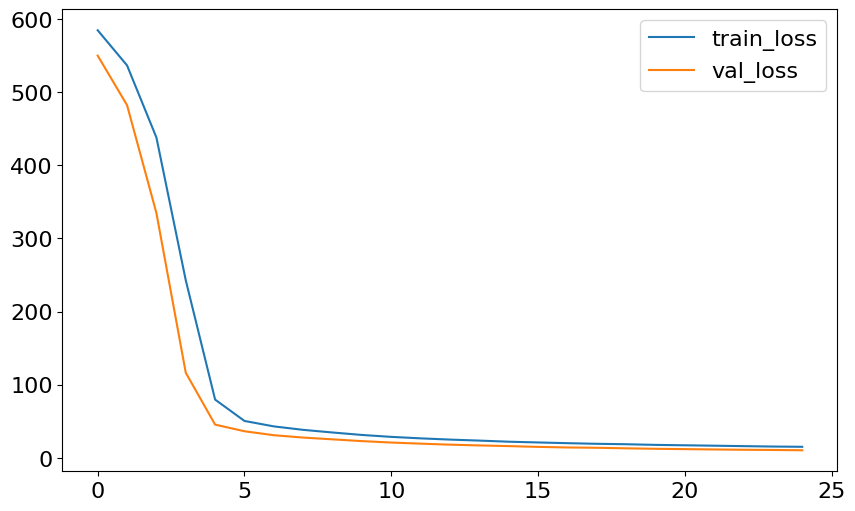

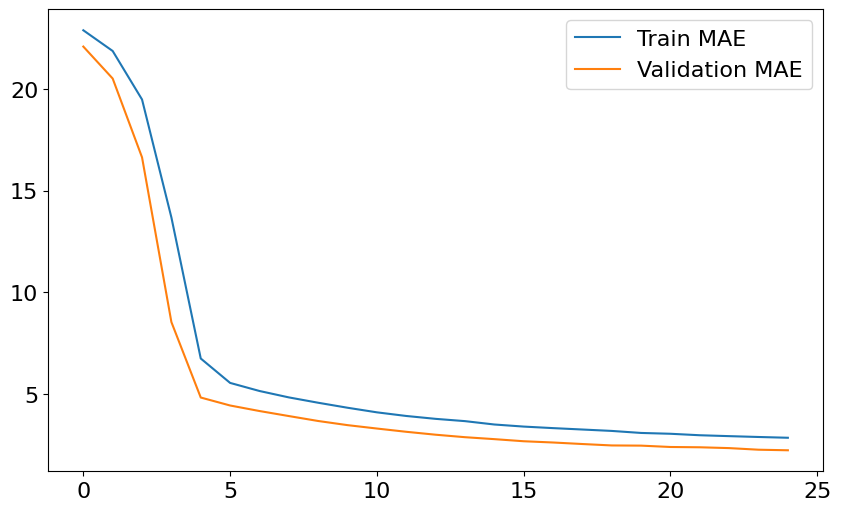

In [74]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(EPOCHS_REG), y=history.history['loss'], label='train_loss')
sns.lineplot(x=range(EPOCHS_REG), y=history.history['val_loss'], label='val_loss')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(EPOCHS_REG), y=history.history['mean_absolute_error'], label='Train MAE')
sns.lineplot(x=range(EPOCHS_REG), y=history.history['val_mean_absolute_error'], label='Validation MAE')
plt.show()

## Evaluierung

![title](../Bilder/MAE.png)

In [75]:
loss_regression, mae = reg_model.evaluate(X_test,y_test)

print(f'Loss: {loss_regression:.4} | Mean Absolute Error: {mae:.5}')

3/3 [==============================] - 0s 1ms/step - loss: 14.2080 - mean_absolute_error: 2.8094
Loss: 14.21 | Mean Absolute Error: 2.8094


In [76]:
print(f'Durchschnittliche Abweichung von ca.: {mae:.5}')

Durchschnittliche Abweichung von ca.: 2.8094


Frage: Löst dies das Business Problem?

# Klassifikation

Nachdem wir die Regression betrachtet haben gehen wir nun über zur Klassifikation. Im Gegensatz zur Klassifikation versuchen wir bei der Klassifikation kategorische Werte vorherzusagen, statt 
numerischen. Für dieses Beispiel verwenden wir als target "origin".

In [77]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,1.498191,1.090604,0.669196,0.630870,-1.295498,70,2,chevrolet chevelle malibu
1,15.0,1.498191,1.503514,1.586599,0.854333,-1.477038,70,2,buick skylark 320
2,18.0,1.498191,1.196232,1.193426,0.550470,-1.658577,70,2,plymouth satellite
3,16.0,1.498191,1.061796,1.193426,0.546923,-1.295498,70,2,amc rebel sst
4,17.0,1.498191,1.042591,0.931311,0.565841,-1.840117,70,2,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,-0.856321,-0.513026,-0.484111,-0.213324,0.011586,82,2,ford mustang gl
394,44.0,-0.856321,-0.925936,-1.375302,-0.993671,3.279296,82,0,vw pickup
395,32.0,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730,82,2,dodge rampage
396,28.0,-0.856321,-0.705077,-0.667591,-0.408411,1.100822,82,2,ford ranger


## Grundsätzlich gleiches Vorgehen für Pre-Processing 

In [78]:
fill_values = mpg.groupby('origin')['horsepower'].transform('mean')
mpg.horsepower = mpg.horsepower.fillna(fill_values)

label_encoder = LabelEncoder()
scaler = StandardScaler()

mpg.origin = label_encoder.fit_transform(mpg.origin)

In [79]:
mpg.loc[:,'cylinders':'acceleration'] = scaler.fit_transform(mpg.loc[:,'cylinders':'acceleration'])

In [80]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,1.498191,1.090604,0.669196,0.630870,-1.295498,70,2,chevrolet chevelle malibu
1,15.0,1.498191,1.503514,1.586599,0.854333,-1.477038,70,2,buick skylark 320
2,18.0,1.498191,1.196232,1.193426,0.550470,-1.658577,70,2,plymouth satellite
3,16.0,1.498191,1.061796,1.193426,0.546923,-1.295498,70,2,amc rebel sst
4,17.0,1.498191,1.042591,0.931311,0.565841,-1.840117,70,2,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,-0.856321,-0.513026,-0.484111,-0.213324,0.011586,82,2,ford mustang gl
394,44.0,-0.856321,-0.925936,-1.375302,-0.993671,3.279296,82,0,vw pickup
395,32.0,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730,82,2,dodge rampage
396,28.0,-0.856321,-0.705077,-0.667591,-0.408411,1.100822,82,2,ford ranger


In [81]:
mpg.model_year = mpg.model_year.astype("int")

In [82]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,1.498191,1.090604,0.669196,0.630870,-1.295498,70,2,chevrolet chevelle malibu
1,15.0,1.498191,1.503514,1.586599,0.854333,-1.477038,70,2,buick skylark 320
2,18.0,1.498191,1.196232,1.193426,0.550470,-1.658577,70,2,plymouth satellite
3,16.0,1.498191,1.061796,1.193426,0.546923,-1.295498,70,2,amc rebel sst
4,17.0,1.498191,1.042591,0.931311,0.565841,-1.840117,70,2,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,-0.856321,-0.513026,-0.484111,-0.213324,0.011586,82,2,ford mustang gl
394,44.0,-0.856321,-0.925936,-1.375302,-0.993671,3.279296,82,0,vw pickup
395,32.0,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730,82,2,dodge rampage
396,28.0,-0.856321,-0.705077,-0.667591,-0.408411,1.100822,82,2,ford ranger


In [83]:
X = mpg.drop(columns=['origin', 'name'])
y = mpg.origin

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Modelling

In [85]:
clf_model = keras.models.Sequential()
clf_model.add(keras.layers.Input(shape=(X_train.shape[1],)))
clf_model.add(keras.layers.Dense(20, activation='relu'))
clf_model.add(keras.layers.Dense(20, activation='relu'))
clf_model.add(keras.layers.Dense(3, activation='softmax')) # 3 Output Neuronen, 1 für jede Klasse, softmax activation da Klassen exklusiv sind

Alternative:

In [86]:
# clf_model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[X.shape[1]]),
#     keras.layers.Dense(10, activation="relu"),
#     keras.layers.Dense(10, activation="relu"),
#     keras.layers.Dense(3, activation='softmax')
# ])

In [87]:
clf_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                160       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 3)                 63        
                                                                 
Total params: 643 (2.51 KB)
Trainable params: 643 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
clf_model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd",metrics=["accuracy"]) #learning rate by default = 0.01

In [89]:
BATCHSIZE_CLF = 32
EPOCHS_CLF = 30

In [90]:
X_train

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
325,44.3,-0.856321,-0.993154,-1.480148,-1.046877,2.226367,80
36,19.0,0.320935,0.543257,-0.431688,0.392036,-0.024722,71
69,12.0,1.498191,1.503514,1.455542,1.756462,-0.750880,72
324,40.8,-0.856321,-1.041167,-1.034553,-1.017318,1.318670,80
142,26.0,-0.856321,-1.098783,-0.982129,-1.191123,-0.024722,74
...,...,...,...,...,...,...,...
382,34.0,-0.856321,-0.820308,-0.903495,-0.857702,0.483588,82
271,23.2,-0.856321,-0.359385,0.013908,-0.266530,0.410972,78
31,25.0,-0.856321,-0.772295,-0.248207,-0.877802,-0.569341,71
60,20.0,-0.856321,-0.513026,-0.379265,-0.664980,1.427593,72


In [91]:
history = clf_model.fit(X_train, y_train, batch_size=BATCHSIZE_CLF, epochs=EPOCHS_CLF, validation_split = 0.2)

Epoch 1/30
8/8 [==============================] - 0s 9ms/step - loss: 5.8049 - accuracy: 0.5118 - val_loss: 0.6902 - val_accuracy: 0.7188
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: 0.8219 - accuracy: 0.6535 - val_loss: 0.6893 - val_accuracy: 0.6719
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 0.8055 - accuracy: 0.6457 - val_loss: 0.6881 - val_accuracy: 0.7656
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 0.8904 - accuracy: 0.5906 - val_loss: 0.6993 - val_accuracy: 0.6719
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.7650 - accuracy: 0.6654 - val_loss: 0.7968 - val_accuracy: 0.7188
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.7650 - accuracy: 0.6969 - val_loss: 0.6937 - val_accuracy: 0.6719
Epoch 7/30
8/8 [==============================] - 0s 2ms/step - loss: 0.7999 - accuracy: 0.6732 - val_loss: 0.7197 - val_accuracy: 0.7812
Epoch 8/30
8/8 [==================

In [92]:
loss_clf, acc = clf_model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.8135 - accuracy: 0.5875


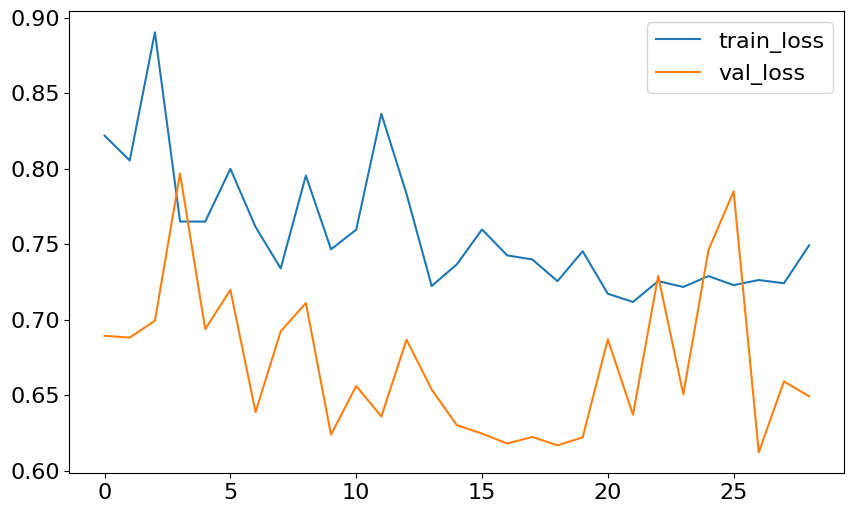

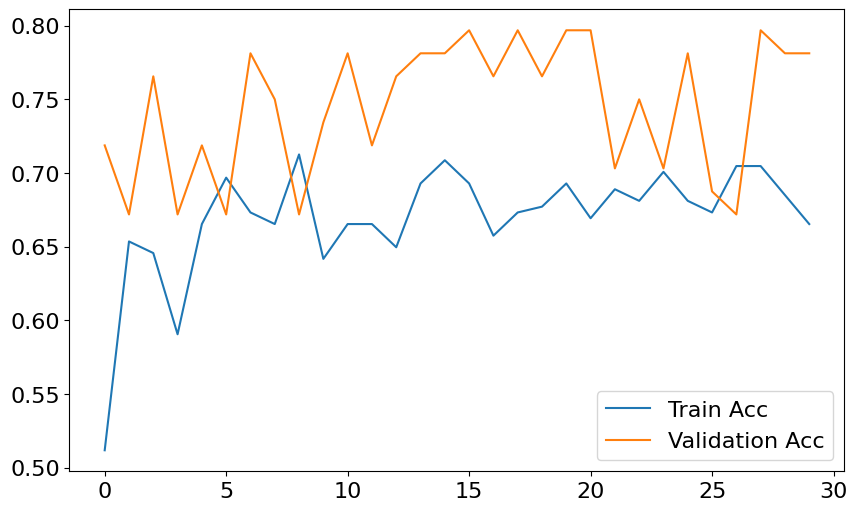

In [93]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(EPOCHS_CLF-1), y=history.history['loss'][1:], label='train_loss')
sns.lineplot(x=range(EPOCHS_CLF-1), y=history.history['val_loss'][1:], label='val_loss')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(EPOCHS_CLF), y=history.history['accuracy'], label='Train Acc')
sns.lineplot(x=range(EPOCHS_CLF), y=history.history['val_accuracy'], label='Validation Acc')
plt.show()

### Standardskalierung umkehren

In [94]:
# scaler.inverse_transform(np.array([-0.706439,1.498191,1.090604,0.667358,0.630870,-1.295498]).reshape(-1,1)) ## Wichtig! Modell muss das Gleiche sein

In [95]:
predictions = clf_model.predict(np.array([-0.706439,1.498191,1.090604,0.667358,0.630870,-1.295498,70.000000]).reshape(-1,7))
print(predictions)

1/1 [==============================] - 0s 43ms/step
[[0.00976209 0.00187206 0.9883659 ]]


#### Warum schlechte Accuracy? 
- Unzureichende Trainingsdaten
- Explorative Datenanalyse fehlt
- Informative Features?
- Irrelevante Features entfernen

In [60]:
np.array([-0.706439,1.498191,1.090604,0.667358,0.630870,-1.295498,70.000000]).shape

(7,)

In [63]:
np.array([-0.706439,1.498191,1.090604,0.667358,0.630870,-1.295498,70.000000, -0.706439,1.498191,1.090604,0.667358,0.630870,-1.295498,70.000000]).reshape(-1, 7)

array([[-0.706439,  1.498191,  1.090604,  0.667358,  0.63087 , -1.295498,
        70.      ],
       [-0.706439,  1.498191,  1.090604,  0.667358,  0.63087 , -1.295498,
        70.      ]])